# importando as bibliotecas
- **Pipeline**
    - Pipeline de transformações com um estimador final.
    - Aplique sequencialmente uma lista de transformações e um estimador final. Etapas intermediárias do pipeline devem ser 'transformadas', ou seja, devem implementar métodos de ajuste e transformação. O estimador final só precisa implementar o ajuste. Os transformadores no pipeline podem ser armazenados em cache usando o memory argumento.
    - O objetivo do pipeline é montar várias etapas que podem ser validadas em conjunto juntas ao definir parâmetros diferentes. Para isso, permite definir parâmetros das várias etapas usando seus nomes e o nome do parâmetro separado por um '__'. O estimador de um passo pode ser substituído inteiramente definindo o parâmetro com seu nome para outro estimador, ou um transformador removido definindo para Nenhum.
    
- **StratifiedKFold**
    - Validador cruzado de dobras K estratificadas
    - Fornece índices de treino / teste para dividir os dados nos conjuntos de treinamento / teste.
    - Este objeto de validação cruzada é uma variação do KFold que retorna dobras estratificadas. As dobras são feitas preservando a porcentagem de amostras para cada classe.

- **cross_val_score**
    - Avaliar uma pontuação por validação cruzada


In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as snb
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn import metrics

In [2]:
cols = ['id', 'diagnostic', 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]
data = pd.read_csv('datasets/wdbc.data', names=cols)

In [3]:
data.head()

,id,diagnostic,3,4,5,6,7,8,9,10,...,23,24,25,26,27,28,29,30,31,32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
data['diagnostic'] = np.where(data['diagnostic'] == 'M', 1, 0)

In [5]:
data.groupby('diagnostic').size()

diagnostic
0    357
1    212
dtype: int64

In [6]:
data.shape

(569, 32)

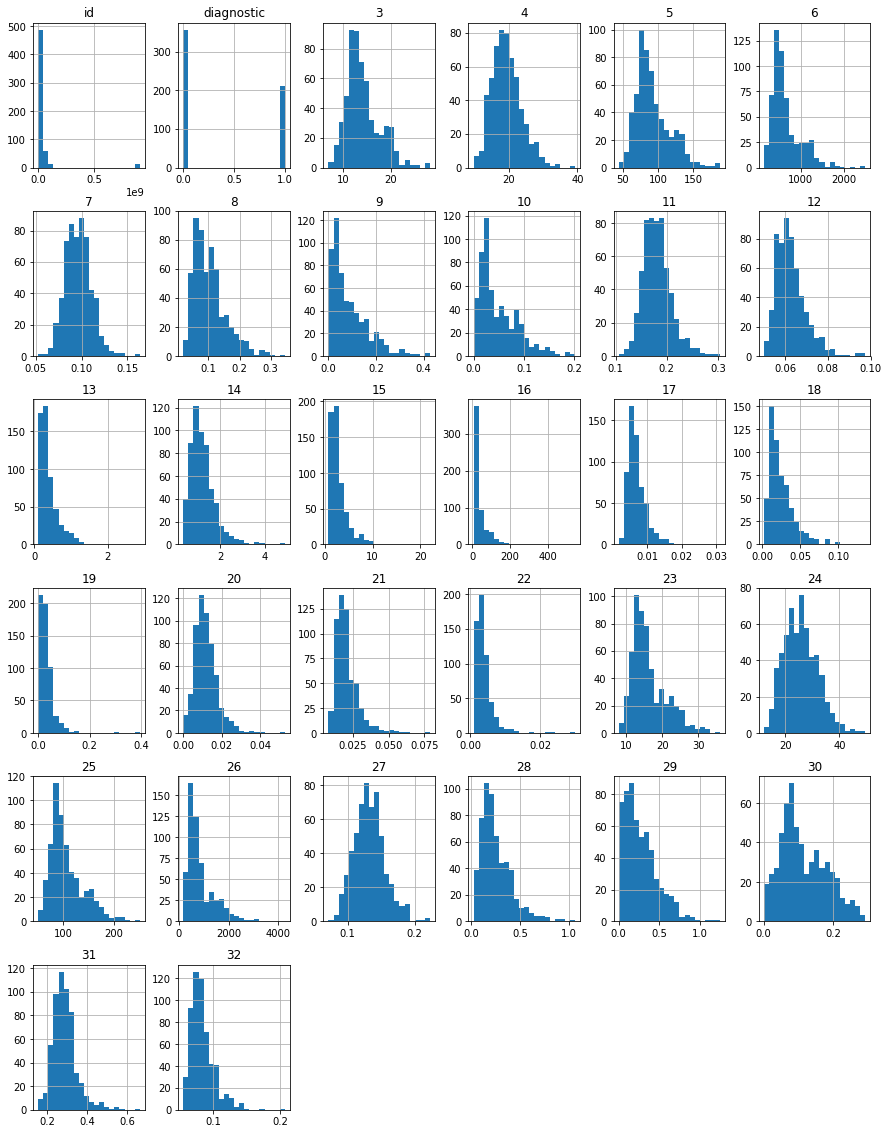

In [7]:
data.hist(bins=20, figsize=(15,20));

In [8]:
data.corr().style.background_gradient(cmap='RdYlGn', axis=None)

,id,diagnostic,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32
id,1,0.0397685,0.0746265,0.0997699,0.0731594,0.0968928,-0.0129682,9.57011e-05,0.05008,0.0441581,-0.0221141,-0.0525114,0.143048,-0.00752619,0.137331,0.177742,0.0967806,0.033961,0.0552393,0.0787681,-0.0173063,0.0257253,0.0824053,0.0647195,0.0799859,0.107187,0.010338,-0.0029681,0.0232027,0.0351736,-0.0442243,-0.0298656
diagnostic,0.0397685,1,0.730029,0.415185,0.742636,0.708984,0.35856,0.596534,0.69636,0.776614,0.330499,-0.0128376,0.567134,-0.00830333,0.556141,0.548236,-0.067016,0.292999,0.25373,0.408042,-0.00652176,0.0779724,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.65961,0.793566,0.416294,0.323872
3,0.0746265,0.730029,1,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,0.67909,-0.0973174,0.674172,0.735864,-0.2226,0.206,0.194204,0.376169,-0.104321,-0.0426413,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.00706589
4,0.0997699,0.415185,0.323782,1,0.329533,0.321086,-0.0233885,0.236702,0.302418,0.293464,0.071401,-0.0764372,0.275869,0.386358,0.281673,0.259845,0.00661378,0.191975,0.143293,0.163851,0.00912717,0.0544575,0.352573,0.912045,0.35804,0.343546,0.0775034,0.27783,0.301025,0.295316,0.105008,0.119205
5,0.0731594,0.742636,0.997855,0.329533,1,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,0.691765,-0.0867611,0.693135,0.744983,-0.202694,0.250744,0.228082,0.407217,-0.0816293,-0.00552339,0.969476,0.303038,0.970387,0.94155,0.150549,0.455774,0.563879,0.771241,0.189115,0.0510185
6,0.0968928,0.708984,0.987357,0.321086,0.986507,1,0.177028,0.498502,0.685983,0.823269,0.151293,-0.28311,0.732562,-0.0662802,0.726628,0.800086,-0.166777,0.212583,0.20766,0.37232,-0.0724966,-0.019887,0.962746,0.287489,0.95912,0.959213,0.123523,0.39041,0.512606,0.722017,0.14357,0.0037376
7,-0.0129682,0.35856,0.170581,-0.0233885,0.207278,0.177028,1,0.659123,0.521984,0.553695,0.557775,0.584792,0.301467,0.0684064,0.296092,0.246552,0.332375,0.318943,0.248396,0.380676,0.200774,0.283607,0.21312,0.0360718,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
8,9.57011e-05,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1,0.883121,0.831135,0.602641,0.565369,0.497473,0.0462048,0.548905,0.455653,0.135299,0.738722,0.570517,0.642262,0.229977,0.507318,0.535315,0.248133,0.59021,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
9,0.05008,0.69636,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1,0.921391,0.500667,0.336783,0.631925,0.0762183,0.660391,0.617427,0.0985637,0.670279,0.69127,0.68326,0.178009,0.449301,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.51493
10,0.0441581,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1,0.462497,0.166917,0.69805,0.0214796,0.71065,0.690299,0.0276533,0.490424,0.439167,0.615634,0.0953508,0.257584,0.830318,0.292752,0.855923,0.80963,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661


In [9]:
corr = data.corr()

In [11]:
y = data['diagnostic'].values
data.drop(['diagnostic', 'id'], axis=1, inplace=True)
X = data.values

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, shuffle=True, random_state=42)

In [13]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((455, 30), (114, 30), (455,), (114,))

In [14]:
scala = StandardScaler()

In [15]:
X_train_std = scala.fit_transform(X_train)
X_test_std = scala.transform(X_test)

In [16]:
models = {'None', 'l1', 'l2', 'ElasticNet'}
alfas = {0.1, 0.01, 0.001, 0.0001}

In [17]:
for i in models:
    for j in alfas:
        model = Perceptron(penalty=i, alpha=j, max_iter=1000, tol=1e-3)
        model.fit(X_train_std, y_train)
        y_pred = model.predict(X_test_std)
        print('Accuracy com penalidade {} e alpha {}: {}'.format(i, j, metrics.accuracy_score(y_test, y_pred)))
    print('\n')

Accuracy com penalidade l2 e alpha 0.1: 0.9473684210526315
Accuracy com penalidade l2 e alpha 0.0001: 0.956140350877193
Accuracy com penalidade l2 e alpha 0.01: 0.9736842105263158
Accuracy com penalidade l2 e alpha 0.001: 0.9736842105263158


Accuracy com penalidade ElasticNet e alpha 0.1: 0.9473684210526315
Accuracy com penalidade ElasticNet e alpha 0.0001: 0.956140350877193
Accuracy com penalidade ElasticNet e alpha 0.01: 0.9736842105263158
Accuracy com penalidade ElasticNet e alpha 0.001: 0.9736842105263158


Accuracy com penalidade l1 e alpha 0.1: 0.6842105263157895
Accuracy com penalidade l1 e alpha 0.0001: 0.9649122807017544
Accuracy com penalidade l1 e alpha 0.01: 0.9385964912280702
Accuracy com penalidade l1 e alpha 0.001: 0.8771929824561403


Accuracy com penalidade None e alpha 0.1: 0.9736842105263158
Accuracy com penalidade None e alpha 0.0001: 0.9736842105263158
Accuracy com penalidade None e alpha 0.01: 0.9736842105263158
Accuracy com penalidade None e alpha 0.001: 0.97368

In [18]:
kFold = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

In [32]:
for i in models:
    for j in alfas:
        model = Perceptron(penalty=i, alpha=j, max_iter=1000, tol=1e-3)
        acc = cross_val_score(model, X_train_std, y_train, cv=kFold)
        print("Penalidade: {}, alpha: {}".format(i, j))
        print("cross_val_score: {}".format(acc))
        print("Média das accuracy: {}".format(np.mean(acc)))
    print("\n")

Penalidade: l2, alpha: 0.1
cross_val_score: [0.90131579 0.94078947 0.82781457]
Média das accuracy: 0.8899732775647728
Penalidade: l2, alpha: 0.0001
cross_val_score: [0.96710526 0.95394737 0.97350993]
Média das accuracy: 0.9648541884512606
Penalidade: l2, alpha: 0.01
cross_val_score: [0.82236842 0.95394737 0.9602649 ]
Média das accuracy: 0.9121935633786453
Penalidade: l2, alpha: 0.001
cross_val_score: [0.93421053 0.91447368 0.95364238]
Média das accuracy: 0.9341088648774254


Penalidade: ElasticNet, alpha: 0.1
cross_val_score: [0.90131579 0.94078947 0.82781457]
Média das accuracy: 0.8899732775647728
Penalidade: ElasticNet, alpha: 0.0001
cross_val_score: [0.96710526 0.95394737 0.97350993]
Média das accuracy: 0.9648541884512606
Penalidade: ElasticNet, alpha: 0.01
cross_val_score: [0.82236842 0.95394737 0.9602649 ]
Média das accuracy: 0.9121935633786453
Penalidade: ElasticNet, alpha: 0.001
cross_val_score: [0.93421053 0.91447368 0.95364238]
Média das accuracy: 0.9341088648774254


Penalida

In [31]:
for i in models:
    for j in alfas:
        model = Perceptron(penalty=i, alpha=j, max_iter=1000, tol=1e-3)
        s = StandardScaler()
        pipe = Pipeline([('transform', s), ('estimator', model)])
        acc = cross_val_score(pipe, X_train_std, y_train, cv=kFold)
        print("Penalidade: {}, alpha: {}".format(i, j))
        print("cross_val_score: {}".format(acc))
        print("Média das accuracy: {}".format(np.mean(acc)))
    print("\n")

Penalidade: l2, alpha: 0.1
cross_val_score: [0.73684211 0.84868421 0.85430464]
Média das accuracy: 0.8132769838503543
Penalidade: l2, alpha: 0.0001
cross_val_score: [0.96710526 0.94736842 0.9602649 ]
Média das accuracy: 0.9582461949575926
Penalidade: l2, alpha: 0.01
cross_val_score: [0.94736842 0.92105263 0.84768212]
Média das accuracy: 0.9053677239456256
Penalidade: l2, alpha: 0.001
cross_val_score: [0.875      0.92763158 0.96688742]
Média das accuracy: 0.9231729987219706


Penalidade: ElasticNet, alpha: 0.1
cross_val_score: [0.73684211 0.84868421 0.85430464]
Média das accuracy: 0.8132769838503543
Penalidade: ElasticNet, alpha: 0.0001
cross_val_score: [0.96710526 0.94736842 0.9602649 ]
Média das accuracy: 0.9582461949575926
Penalidade: ElasticNet, alpha: 0.01
cross_val_score: [0.94736842 0.92105263 0.84768212]
Média das accuracy: 0.9053677239456256
Penalidade: ElasticNet, alpha: 0.001
cross_val_score: [0.875      0.92763158 0.96688742]
Média das accuracy: 0.9231729987219706


Penalida

In [20]:
model3 = Perceptron(max_iter=1000, tol=1e-3)

In [23]:
s = StandardScaler()
pipeline = Pipeline([('transform', s), ('estimator', model3)])
acc = cross_val_score(pipeline, X, y, cv=kFold)
acc

array([0.92105263, 0.95263158, 0.95767196])

In [24]:
np.mean(acc)

0.9437853893994245